In [87]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [45]:
def roll_a_dice():
    return pd.DataFrame({'value':[random.randrange(1,7) for i in range(10)]}, index = range(1,11))
     

In [73]:
results = roll_a_dice()
results

,value
1,3
2,5
3,2
4,2
5,3
6,6
7,3
8,5
9,5
10,2


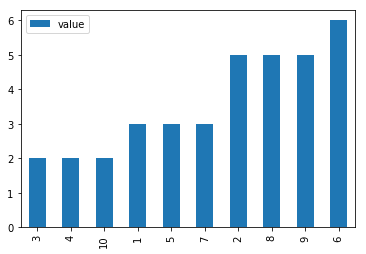

In [74]:
results.sort_values(by='value').plot(kind='bar')

<BarContainer object of 6 artists>

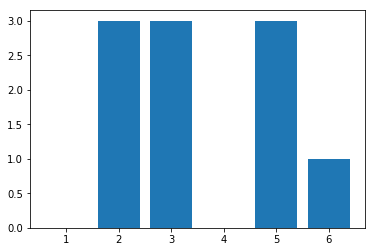

In [93]:
freqs = results['value'].value_counts()
freqs = pd.DataFrame(data=freqs).sort_index().reset_index().rename(columns={'value':'freq','index':'value'})
poss_values = pd.DataFrame(data={'value': pd.Series(range(1,7))})

hist = poss_values.merge(freqs, how='left').fillna(0)
plt.bar(hist['value'],hist['freq'])